# Linear Regression


### Initialization

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.model_selection import train_test_split

filename = "encoded_data_04_13.csv"
df = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df.head()

,name,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,market_value_in_eur,age_at_evaluation,log_market_value_base10,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,Miroslav Klose,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,4000000.0,35,6.60206,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
1,Miroslav Klose,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,2000000.0,35,6.30103,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
2,Miroslav Klose,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
3,Miroslav Klose,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
4,Miroslav Klose,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,1000000.0,37,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06


In [26]:
X = df.drop(columns=['log_market_value_base10', "name", "market_value_in_eur"])
y = df['log_market_value_base10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Reverse normalization for actual values
y_test_original = np.power(10, y_test)

# Reverse normalization for predicted values
y_pred_original = np.power(10, y_pred)


result = sklearn.metrics.mean_absolute_percentage_error(y_pred=y_pred_original, y_true=y_test_original)
print("MAPE", result)



MAPE 0.9656685327548005


In [27]:

z = pd.merge(X_test, df, on=['height_in_cm','year','goals_for','goals_against','goals','assists','red_cards','yellow_cards','minutes_played','age_at_evaluation','country_of_citizenship_encoded','sub_position_encoded','club_id_encoded','domestic_competition_id_encoded'])
print(z.shape)
z.set_index(X_test.index, inplace=True)
z['Predicted_Value_log'] = y_pred
z['Predicted_Value'] = np.power(10, y_pred)

results = z[['name', 'year', 'market_value_in_eur', 'Predicted_Value', 'log_market_value_base10', 'Predicted_Value_log']]
results.sort_values(by='Predicted_Value', ascending=False)



(12080, 17)


,name,year,market_value_in_eur,Predicted_Value,log_market_value_base10,Predicted_Value_log
56905,Raheem Sterling,2020.75,110000000.0,8.620238e+08,8.041393,8.935519
11406,Lionel Messi,2012.75,120000000.0,8.129705e+08,8.079181,8.910075
20395,Luis Suárez,2018.25,70000000.0,7.785900e+08,7.845098,8.891309
3182,Cristiano Ronaldo,2013.25,100000000.0,7.729526e+08,8.000000,8.888153
42705,Kevin De Bruyne,2017.75,110000000.0,6.621904e+08,8.041393,8.820983
...,...,...,...,...,...,...
17240,Aleksey Ivanov,2016.25,150000.0,1.678431e+05,5.176091,5.224903
4162,Paul Gallacher,2015.75,200000.0,1.652880e+05,5.301030,5.218241
34317,Ilias Michalopoulos,2012.75,300000.0,1.650143e+05,5.477121,5.217522
1219,Sander Boschker,2013.25,100000.0,1.630542e+05,5.000000,5.212332


Cristiano Ronaldo
Lionel Messi
Mohamed Salah
Jude Bellingham
Raheem Sterling
Neymar
Eden Hazard
Kevin De Bruyne
Kevin De Bruyne
Raheem Sterling
Erling Haaland
Harry Kane
Luis Suárez
Kylian Mbappé
Jadon Sancho
Antoine Griezmann


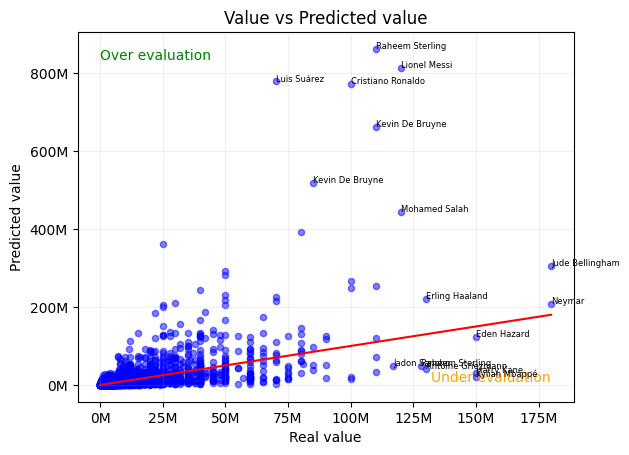

In [28]:
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
# Scatter plot
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red')
plt.text(min(y_test_original), max(y_pred_original), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Add player names for values over 50 million
for index, row in results.iterrows():
    if row['market_value_in_eur'] > 110000000 or row['Predicted_Value'] > 410000000:  # Assuming the value is in EUR
        print(row['name'])
        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Initialize lists for names and coordinates
#names = []
#coords = []

# Add player names for values over 100 million to the lists
#for index, row in z.iterrows():
#    if row['market_value_in_eur'] > 120000000:  # Assuming the value is in EUR
#        names.append(row['name'])
##        coords.append((row['market_value_in_eur'], row['Predicted_Value']))

# Annotate names as a text box with arrows
#for name, coord in zip(names, coords):
#    plt.annotate(name, xy=coord, xytext=(0, 0), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=6)

# Set formatter for x-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.2, zorder=1)
plt.show()


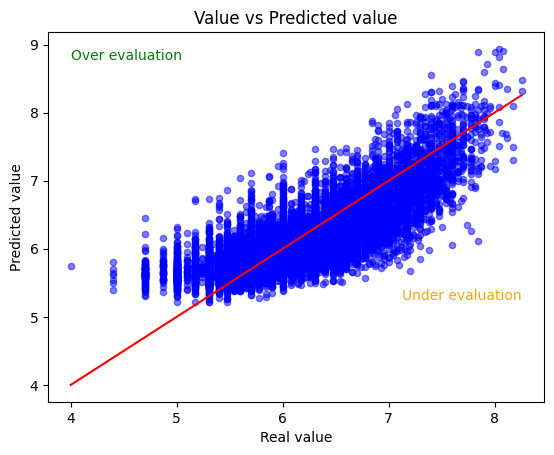

In [29]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

plt.show()
